In [20]:
!pip uninstall -y openai

Found existing installation: openai 1.57.4
Uninstalling openai-1.57.4:
  Successfully uninstalled openai-1.57.4


In [21]:
!pip install openai

  Using cached openai-1.57.4-py3-none-any.whl.metadata (24 kB)
Using cached openai-1.57.4-py3-none-any.whl (390 kB)


In [22]:
import openai

In [23]:
print(openai.__version__)

1.57.4


In [24]:
# Initiate OpenAI client
import os
from openai import OpenAI
api_key = os.getenv("OPENAI_API_KEY")
#client = OpenAI(api_key="OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

In [26]:
# Make a request to the Chat API
try:
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # Use "gpt-4" if needed
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "Hello! How can I help detect fake news?"}
        ],
        max_tokens=50
    )
    print(response.choices[0].message.content)
except Exception as e:
    print(f"Error: {e}")

Hello! It's great that you're concerned about identifying fake news. Here are some tips to help you detect fake news:

1. Check the source: Verify the source of the news. Reliable news sources have a history of accurate reporting.

2.


In [28]:
import requests
from bs4 import BeautifulSoup

def fetch_article_content(url):
    try:
        # Add headers to mimic a browser
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }

        # Fetch the HTML content of the page
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise error if the request fails

        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the main content (adjust selectors based on website structure)
        paragraphs = soup.find_all('p')
        article_text = " ".join([p.get_text() for p in paragraphs])

        return article_text
    except Exception as e:
        print(f"Error fetching the article: {e}")
        return None

# Example usage:
url = input("Enter the article URL: ")
article_text = fetch_article_content(url)
if article_text:
    print("\nExtracted Article Text:")
    print(article_text[:500])  # Print only the first 500 characters for preview

Enter the article URL: https://www.hindustantimes.com/cricket/india-vs-australia-live-score-today-3rd-test-day-2-border-gavaskar-trophy-gabba-ind-vs-aus-latest-scorecard-updates-101734197556883.html

Extracted Article Text:
India vs Australia 3rd Test Day 2 Live Score: The Indian bowling attack, led by Jasprit Bumrah, will look to make early inroads, provided the rain stays away on the second day of the Gabba Test in Brisbane. India vs Australia 3rd Test Day 2 Live Score: Jasprit Bumrah got rid of the Australian openers early on Day 2 to give India an advantage. Left-handed Usman Khawaja was caught behind for 21, while Nathan McSweeney departed on 9. Earlier, the play began on time with pleasant weather on offer...


In [29]:
!pip install wordcloud matplotlib

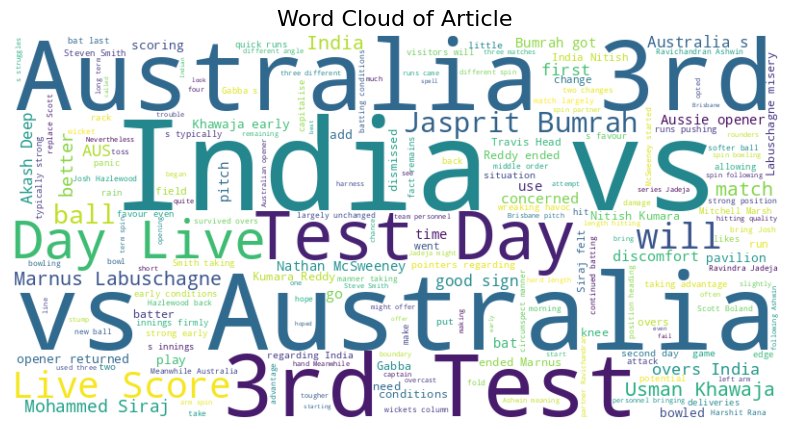

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    # Create a word cloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',  # Optional: set a color theme
        stopwords=None       # You can add a list of words to ignore
    ).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axes
    plt.title("Word Cloud of Article", fontsize=16)
    plt.show()

if article_text:
    generate_word_cloud(article_text)

In [31]:
def summarize_text(text, max_length=100):
    try:
        # Make a request to GPT for summarization
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",  # Use "gpt-4" if available
            messages=[
                {"role": "system", "content": "You are an assistant summarizing articles."},
                {"role": "user", "content": f"Summarize the following article in under {max_length} words:\n{text}"}
            ],
            max_tokens=150
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error summarizing the text: {e}")
        return None

if article_text:
    print("\nGenerating Summary...")
    summary = summarize_text(article_text, max_length=100)
    if summary:
        print("\nArticle Summary:")
        print(summary)



Generating Summary...

Article Summary:
Despite rain interruptions on Day 1 of the India vs Australia 3rd Test at the Gabba, play resumed on Day 2 with India's Jasprit Bumrah making early breakthroughs, dismissing Usman Khawaja and Nathan McSweeney. India made strategic team changes introducing Akash Deep and Ravindra Jadeja. Australia's Khawaja and McSweeney showed resilience, surviving 13.2 overs unscathed. Mohammed Siraj caused discomfort for Australian batters, with Nitish Kumara Reddy dismissing Labuschagne. Bumrah and Akash Deep bowled well, aiming to contain Australia's top order. Rain forecasts linger, impacting game rhythm. The match continues with potential for exciting developments.


Data Time

In [32]:
import pandas as pd

In [34]:
# Loading the datasets
fake_df = pd.read_csv("Fake.csv", on_bad_lines='skip')
true_df = pd.read_csv("True.csv", on_bad_lines='skip')

In [36]:
true_df.shape

(21417, 4)

In [35]:
fake_df.shape

(23481, 4)

In [37]:
# Add a label column: 1 for fake, 0 for real
fake_df["label"] = 1
true_df["label"] = 0

In [38]:
# Combine the datasets
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

In [39]:
# Shuffle the dataset for randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [41]:
# Preview the combined dataset
print(df.head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  


In [42]:
df.shape

(44898, 5)

In [44]:
# Keep only the relevant columns
df = df[["text", "label"]]

In [45]:
# Drop rows with missing text
df = df.dropna()

In [46]:
df.shape

(44898, 2)

Preprocessing & Vectorizing Text

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# Initializing TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

In [49]:
# Transforming the text into feature vectors
X = vectorizer.fit_transform(df["text"])
y = df["label"]  # Labels: 1 (Fake), 0 (True)

In [51]:
X.shape

(44898, 5000)

In [53]:
y.shape

(44898,)

Splitting the dataset

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(35918, 5000)

In [58]:
X_test.shape

(8980, 5000)

Training a Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
# Train LR model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

print("LR Model training complete!")

LR Model training complete!


In [83]:
import pickle

# Save the trained model and vectorizer again
with open("fake_news_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


Evaluate Logistic Regression Model

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [65]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 98.44%



In [66]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["True News", "Fake News"]))

Classification Report:
              precision    recall  f1-score   support

   True News       0.98      0.99      0.98      4270
   Fake News       0.99      0.98      0.99      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [67]:
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[4219   51]
 [  89 4621]]


Saving the Logistic Regression Model & Vectorizer

In [68]:
import joblib

In [70]:
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Logistic Regression model and vectorizer saved successfully!")

Logistic Regression model and vectorizer saved successfully!


Predict Fake News on New Data with Logistic Regression Model

In [71]:
# Load the saved LR model and vectorizer
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

In [72]:
def predict_fake_news(text):
    # Transform the input text into feature vectors
    features = vectorizer.transform([text])
    # Predict the probability of being fake
    probability = model.predict_proba(features)[0][1]  # Probability of being fake
    return probability

In [73]:
sample_text = "This is a sample news article to test the model."
fake_probability = predict_fake_news(sample_text)
print(f"\nPrediction: {fake_probability * 100:.2f}% chance of being fake.")


Prediction: 95.39% chance of being fake.


Creating Pipeline

Enter a URL or plain text: https://www.bbc.com/news/articles/c62785697v0o

--- Step 1: Word Cloud ---


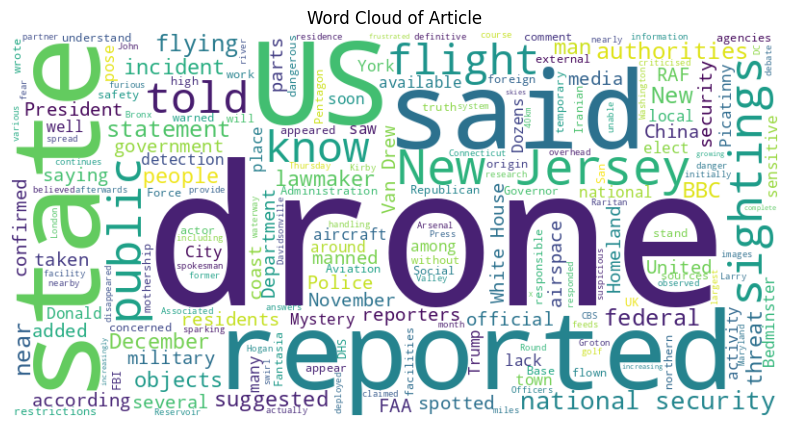


--- Step 2: Article Summary ---
Summary:
 After a series of mysterious drone sightings over New Jersey, authorities have been unable to provide definitive answers on the drones' origins. Dozens of sightings have been reported since November, with drones appearing near sensitive military facilities, President-elect Donald Trump's golf course, and in other states like New York and Connecticut. Despite speculation about foreign involvement, US agencies maintain that the drones do not pose a threat to national security. Lawmakers have criticized the government's response, with some suggesting the drones should be shot down for further analysis. Residents have expressed fear and frustration over the lack of transparency surrounding the situation.

--- Step 3: Fake News Prediction ---
Prediction: 24.76% chance of being fake.


In [77]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Fetch Article Content
def fetch_article_content(url):
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        article_text = " ".join([p.get_text() for p in paragraphs])
        return article_text
    except Exception as e:
        print(f"Error fetching article: {e}")
        return None

# 2. Generate Word Cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Article")
    plt.show()

# 3. Summarize Text using OpenAI
def summarize_text(text, max_length=100):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": f"Summarize this article in under {max_length} words:\n{text}"}
            ],
            max_tokens=150
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error summarizing text: {e}")
        return None

# 4. Predict Fake News
def predict_fake_news(text):
    model = joblib.load("fake_news_model.pkl")
    vectorizer = joblib.load("vectorizer.pkl")
    features = vectorizer.transform([text])
    probability = model.predict_proba(features)[0][1]
    return probability

# 5. End-to-End Pipeline
def fake_news_pipeline(url_or_text):
    if url_or_text.startswith("http"):
        article_text = fetch_article_content(url_or_text)
        if not article_text:
            return
    else:
        article_text = url_or_text

    print("\n--- Step 1: Word Cloud ---")
    generate_word_cloud(article_text)

    print("\n--- Step 2: Article Summary ---")
    summary = summarize_text(article_text)
    if summary:
        print("Summary:\n", summary)

    print("\n--- Step 3: Fake News Prediction ---")
    fake_probability = predict_fake_news(article_text)
    print(f"Prediction: {fake_probability * 100:.2f}% chance of being fake.")

# Sample Test
url_or_text = input("Enter a URL or plain text: ")
fake_news_pipeline(url_or_text)

In [81]:
import os

# Check for saved model and vectorizer
print("Model file exists:", os.path.exists("fake_news_model.pkl"))
print("Vectorizer file exists:", os.path.exists("vectorizer.pkl"))

Model file exists: True
Vectorizer file exists: True


In [84]:
import pickle

# Load the saved model and vectorizer
with open("fake_news_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Test the loaded model
sample_text = ["Breaking news: This is a fake news example to test the model."]
sample_vector = vectorizer.transform(sample_text)
prediction = model.predict(sample_vector)

print("Prediction:", "Fake News" if prediction[0] == 1 else "True News")

Prediction: Fake News


In [85]:
# Function to predict news authenticity
def predict_news():
    print("\nEnter a news article below (or type 'exit' to stop):\n")
    while True:
        user_input = input("Your News Article: ")
        if user_input.lower() == "exit":
            print("Exiting the prediction...")
            break

        # Preprocess and predict
        input_vector = vectorizer.transform([user_input])
        prediction = model.predict(input_vector)

        # Display prediction
        if prediction[0] == 1:
            print("Prediction: 🚨 Fake News\n")
        else:
            print("Prediction: ✅ True News\n")

# Run the prediction function
predict_news()


Enter a news article below (or type 'exit' to stop):

Your News Article: https://www.bbc.com/news/articles/c62785697v0o
Prediction: 🚨 Fake News

Your News Article: exit
Exiting the prediction...
